In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
/kaggle/input/00-churndata-preprocessing/__results__.html
/kaggle/input/00-churndata-preprocessing/__notebook__.ipynb
/kaggle/input/00-churndata-preprocessing/__output__.json
/kaggle/input/00-churndata-preprocessing/custom.css
/kaggle/input/00-churndata-preprocessing/figure/churn_vs.png
/kaggle/input/00-churndata-preprocessing/figure/churn_distribution.png
/kaggle/input/00-churndata-preprocessing/__results___files/__results___6_1.png
/kaggle/input/00-churndata-preprocessing/__results___files/__results___4_0.png
/kaggle/input/00-churndata-preprocessing/processed/orig.csv
/kaggle/input/00-churndata-preprocessing/processed/processed.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv('/kaggle/input/00-churndata-preprocessing/processed/processed.csv')

In [4]:
df.head()

,Unnamed: 0,tenure,PhoneService,MultipleLines,PaperlessBilling,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,No phone service,1,Month-to-month,Electronic check,29.85,29.85,0
1,1,34,1,No,0,One year,Mailed check,56.95,1889.50,0
2,2,2,1,No,1,Month-to-month,Mailed check,53.85,108.15,1
3,3,45,0,No phone service,0,One year,Bank transfer (automatic),42.30,1840.75,0
4,4,2,1,No,1,Month-to-month,Electronic check,70.70,151.65,1


In [5]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Unnamed: 0,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,29.85,0,True,False,False,False,False,True,False
1,1,34,1,0,56.95,1889.50,0,False,False,True,False,False,False,True
2,2,2,1,1,53.85,108.15,1,False,False,False,False,False,False,True
3,3,45,0,0,42.30,1840.75,0,True,False,True,False,False,False,False
4,4,2,1,1,70.70,151.65,1,False,False,False,False,False,True,False


In [6]:
X = df.drop(['Churn', 'Unnamed: 0'], axis=1)
X.head()
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)

(5634, 12) (1409, 12)


<h2>1. Logistic Regression - Baseline</h2>

In [7]:
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

In [8]:
logreg_pipe.fit(X_train, y_train)

y_pred = logreg_pipe.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)

In [9]:
# Balanced class_weight (to improve Recall)
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [10]:
y_pred2 = logreg_pipe.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)

In [11]:
print("---- Baseline Logistic Regression ----\n")
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
print("\nConfusion Matrix:\n", cm1)

print("\n\n---- Baseline Logistic Regression with balanced class weight ----\n")
print("Classification Report:\n", classification_report(y_test, y_pred2, digits=4))
print("\nConfusion Matrix:\n", cm2)

---- Baseline Logistic Regression ----

Classification Report:
               precision    recall  f1-score   support

           0     0.8327    0.8802    0.8558      1035
           1     0.6063    0.5107    0.5544       374

    accuracy                         0.7821      1409
   macro avg     0.7195    0.6954    0.7051      1409
weighted avg     0.7726    0.7821    0.7758      1409


Confusion Matrix:
 [[911 124]
 [183 191]]


---- Baseline Logistic Regression with balanced class weight ----

Classification Report:
               precision    recall  f1-score   support

           0     0.9055    0.7130    0.7978      1035
           1     0.5000    0.7941    0.6136       374

    accuracy                         0.7346      1409
   macro avg     0.7028    0.7536    0.7057      1409
weighted avg     0.7979    0.7346    0.7489      1409


Confusion Matrix:
 [[738 297]
 [ 77 297]]


In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
sm = SMOTE(k_neighbors=5, random_state=42)
X_tr_res, y_tr_res = sm.fit_resample(X_train, y_train)

logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipe.fit(X_tr_res, y_tr_res)

y_pred3 = logreg_pipe.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)

In [14]:
print("\n\n---- SMOTE + Logistic Regression ----\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred3, digits=4))
print("Confusion Matrix:\n", cm3)



---- SMOTE + Logistic Regression ----


Classification Report:
               precision    recall  f1-score   support

           0     0.8701    0.7314    0.7948      1035
           1     0.4842    0.6979    0.5717       374

    accuracy                         0.7225      1409
   macro avg     0.6772    0.7146    0.6832      1409
weighted avg     0.7677    0.7225    0.7356      1409

Confusion Matrix:
 [[757 278]
 [113 261]]


In [15]:
FIG_PATH = 'figures'
os.makedirs(FIG_PATH, exist_ok=True)

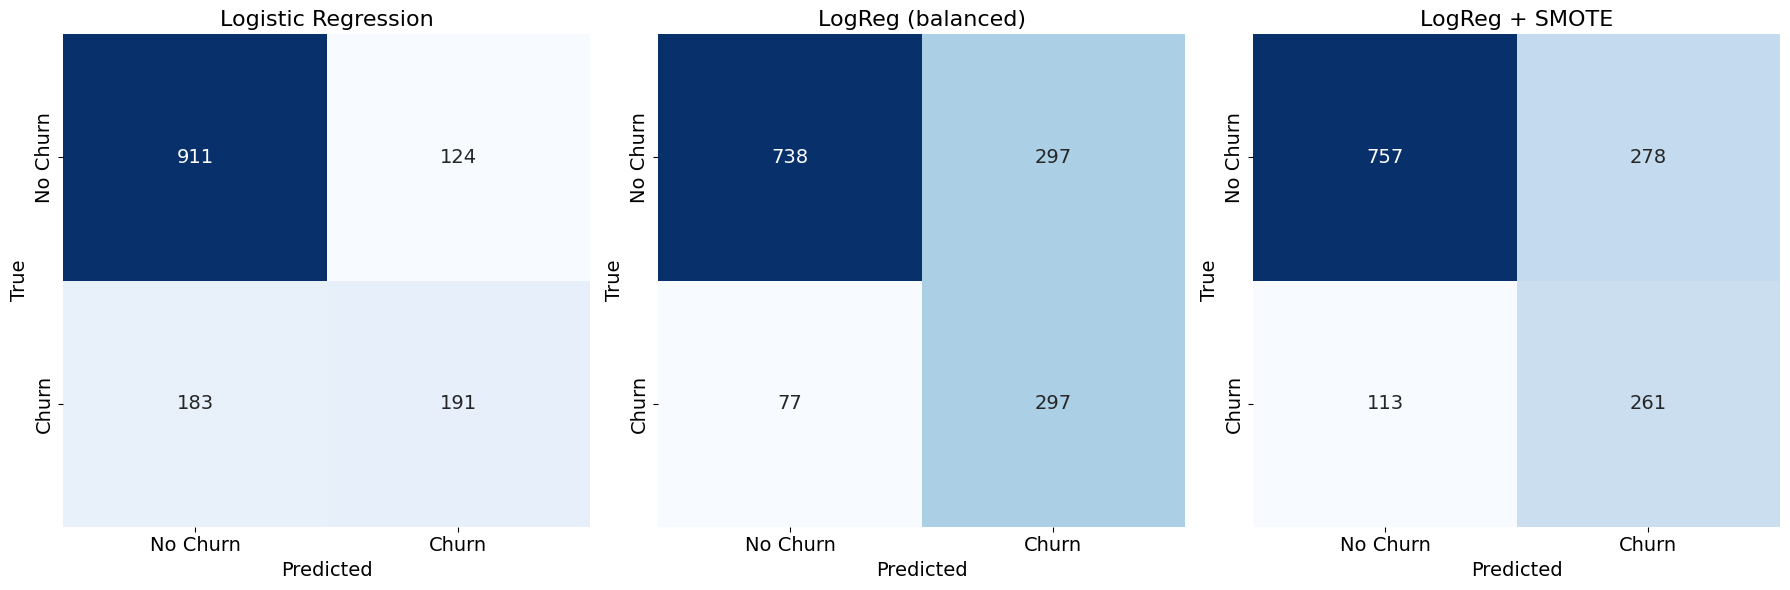

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"],
            ax=axs[0], annot_kws={'size': 14})
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"],
            ax=axs[1], annot_kws={'size': 14})
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Churn","Churn"], yticklabels=["No Churn","Churn"],
            ax=axs[2], annot_kws={'size': 14})
axs[0].set_title("Logistic Regression", fontsize=16)
axs[1].set_title("LogReg (balanced)", fontsize=16)
axs[2].set_title("LogReg + SMOTE", fontsize=16)

for i in range(3):
    axs[i].set_ylabel("True", fontsize=14)
    axs[i].set_xlabel("Predicted", fontsize=14)
    axs[i].tick_params(axis='both', labelsize=14) 
plt.tight_layout()
plt.savefig(FIG_PATH + "/Baseline_Model_CM.png", dpi=200, bbox_inches='tight')
plt.show()